# Customer Retention

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

## 1. Load Data

In [3]:
df = pd.read_excel('../dataset/Telco-Customer-Churn.xlsx')

In [4]:
df.shape

(7043, 21)

In [5]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 2. Data Analysis & Preparation

#### - Encoding target var: Churn

In [7]:
# Yes=1, No=0 으로 Encoding
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [8]:
df['Churn'].mean()

0.2653698707936959

#### - TotalCharges

In [9]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype(float)

/tmp/ipykernel_1769739/1923287730.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype(float)


In [10]:
df.shape

(7043, 21)

In [11]:
df.dropna().shape

(7032, 21)

In [12]:
df = df.dropna()

#### - Continuous Vars

In [13]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [14]:
df['MonthlyCharges'] = np.log(df['MonthlyCharges'])
df['MonthlyCharges'] = (df['MonthlyCharges'] - df['MonthlyCharges'].mean())/df['MonthlyCharges'].std()

df['TotalCharges'] = np.log(df['TotalCharges'])
df['TotalCharges'] = (df['TotalCharges'] - df['TotalCharges'].mean())/df['TotalCharges'].std()

df['tenure'] = (df['tenure'] - df['tenure'].mean()) / df['tenure'].std()

In [15]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7.032000e+03,7.032000e+03,7.032000e+03
mean,-9.952853e-17,-1.271641e-15,-4.163021e-16
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.280157e+00,-1.882268e+00,-2.579056e+00
25%,-9.542285e-01,-7.583727e-01,-6.080585e-01
50%,-1.394072e-01,3.885103e-01,1.950521e-01
75%,9.198605e-01,8.004829e-01,8.382338e-01
max,1.612459e+00,1.269576e+00,1.371323e+00


In [16]:
continuous_vars = list(df.describe().columns)
continuous_vars

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

#### - One-Hot Encoding

In [17]:
for col in list(df.columns):
    print(col, df[col].nunique())

customerID 7032
gender 2
SeniorCitizen 2
Partner 2
Dependents 2
tenure 72
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
MonthlyCharges 1584
TotalCharges 6530
Churn 2


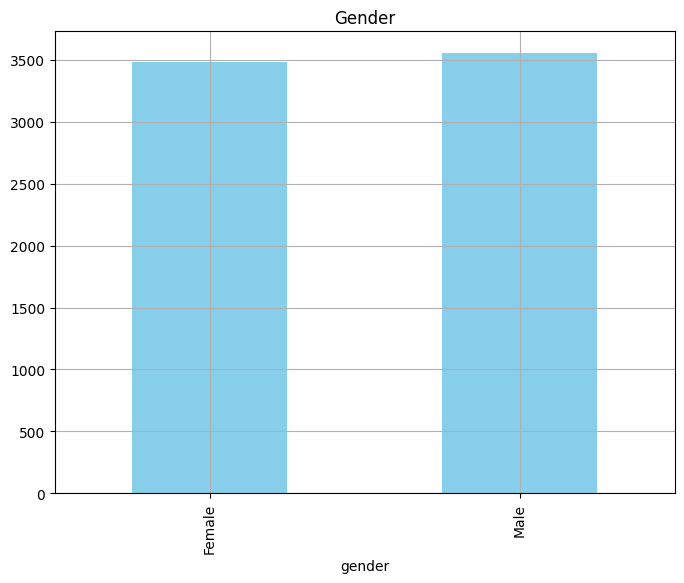

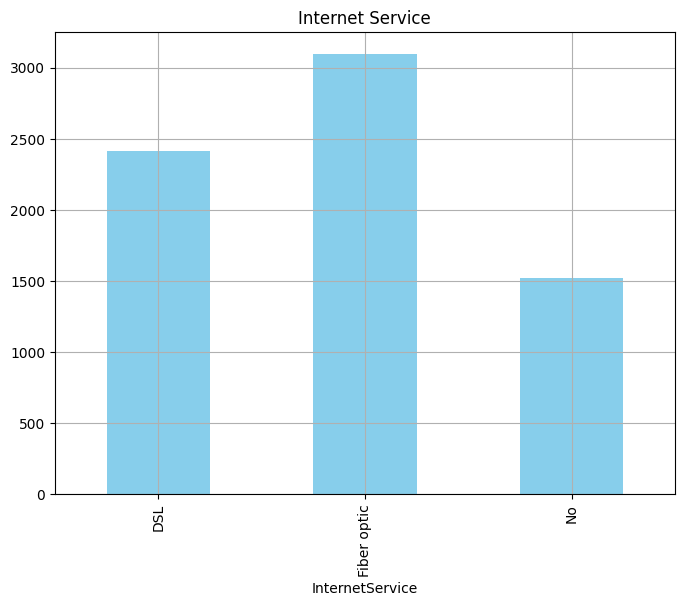

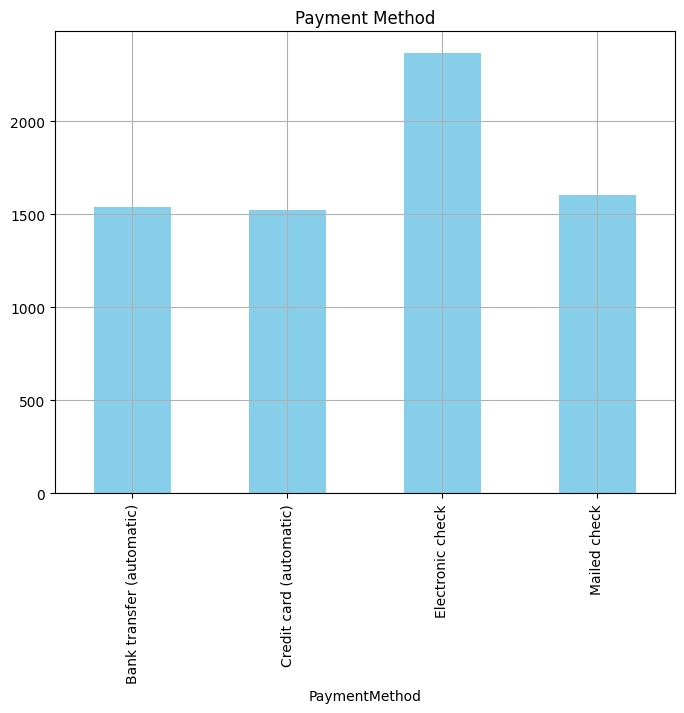

In [18]:
df.groupby('gender').count()['customerID'].plot(
    kind='bar', color='skyblue', grid=True, figsize=(8,6), title='Gender'
)
plt.show()

df.groupby('InternetService').count()['customerID'].plot(
    kind='bar', color='skyblue', grid=True, figsize=(8,6), title='Internet Service'
)
plt.show()

df.groupby('PaymentMethod').count()['customerID'].plot(
    kind='bar', color='skyblue', grid=True, figsize=(8,6), title='Payment Method'
)
plt.show()

In [19]:
dummy_cols = []

sample_set = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].copy(deep=True)

for col in list(df.columns):
    if col not in ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'] and df[col].nunique() < 5:
        dummy_vars = pd.get_dummies(df[col])
        dummy_vars.columns = [col+str(x) for x in dummy_vars.columns]        
        sample_set = pd.concat([sample_set, dummy_vars], axis=1)

In [20]:
sample_set.head(10)

,tenure,MonthlyCharges,TotalCharges,Churn,genderFemale,genderMale,SeniorCitizen0,SeniorCitizen1,PartnerNo,PartnerYes,...,StreamingMoviesYes,ContractMonth-to-month,ContractOne year,ContractTwo year,PaperlessBillingNo,PaperlessBillingYes,PaymentMethodBank transfer (automatic),PaymentMethodCredit card (automatic),PaymentMethodElectronic check,PaymentMethodMailed check
0,-1.280157,-1.054244,-2.281382,0,True,False,True,False,False,True,...,False,True,False,False,False,True,False,False,True,False
1,0.064298,0.032896,0.389269,0,False,True,True,False,True,False,...,False,False,True,False,True,False,False,False,False,True
2,-1.239416,-0.061298,-1.452520,1,False,True,True,False,True,False,...,False,True,False,False,False,True,False,False,False,True
3,0.512450,-0.467578,0.372439,0,False,True,True,False,True,False,...,False,False,True,False,True,False,True,False,False,False
4,-1.239416,0.396862,-1.234860,1,True,False,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False
5,-0.994970,0.974468,-0.147808,1,True,False,True,False,True,False,...,True,True,False,False,False,True,False,False,True,False
6,-0.424595,0.786142,0.409363,0,False,True,True,False,True,False,...,False,True,False,False,False,True,False,True,False,False
7,-0.913487,-1.059891,-0.791550,0,True,False,True,False,True,False,...,False,True,False,False,True,False,False,False,False,True
8,-0.180148,1.059269,0.696733,1,True,False,True,False,False,True,...,True,True,False,False,False,True,False,False,True,False
9,1.205048,0.009088,0.783956,0,False,True,True,False,True,False,...,False,False,True,False,True,False,True,False,False,False


In [21]:
sample_set.shape

(7032, 47)

In [22]:
list(sample_set.columns)

['tenure',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'genderFemale',
 'genderMale',
 'SeniorCitizen0',
 'SeniorCitizen1',
 'PartnerNo',
 'PartnerYes',
 'DependentsNo',
 'DependentsYes',
 'PhoneServiceNo',
 'PhoneServiceYes',
 'MultipleLinesNo',
 'MultipleLinesNo phone service',
 'MultipleLinesYes',
 'InternetServiceDSL',
 'InternetServiceFiber optic',
 'InternetServiceNo',
 'OnlineSecurityNo',
 'OnlineSecurityNo internet service',
 'OnlineSecurityYes',
 'OnlineBackupNo',
 'OnlineBackupNo internet service',
 'OnlineBackupYes',
 'DeviceProtectionNo',
 'DeviceProtectionNo internet service',
 'DeviceProtectionYes',
 'TechSupportNo',
 'TechSupportNo internet service',
 'TechSupportYes',
 'StreamingTVNo',
 'StreamingTVNo internet service',
 'StreamingTVYes',
 'StreamingMoviesNo',
 'StreamingMoviesNo internet service',
 'StreamingMoviesYes',
 'ContractMonth-to-month',
 'ContractOne year',
 'ContractTwo year',
 'PaperlessBillingNo',
 'PaperlessBillingYes',
 'PaymentMethodBank transfer (au

## Evaluate Function

In [54]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay


def plot_confusion_matrix(model, X_test, y_test):
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test, y_test,
        cmap=plt.cm.Blues
    )

def plot_roc_curve(model, X_test, y_test):
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.show()
    
def evaluate(model, y_pred):
    plot_confusion_matrix(model, X_test, y_test)
    print(classification_report(y_test, y_pred))
    plot_roc_curve(model, X_test, y_test)

## Train & Test Sets

In [55]:
target_var = 'Churn'
features = [x for x in list(sample_set.columns) if x != target_var]

X = sample_set[features]
y = sample_set[target_var]

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3
)
X_train.shape, X_test.shape

((4922, 46), (2110, 46))

## CatBoost Classification

In [57]:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier()
cbc.fit(X_train, y_train, verbose=0)
cbc_preds = cbc.predict(X_test)

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1555
           1       0.68      0.54      0.60       555

    accuracy                           0.81      2110
   macro avg       0.76      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110



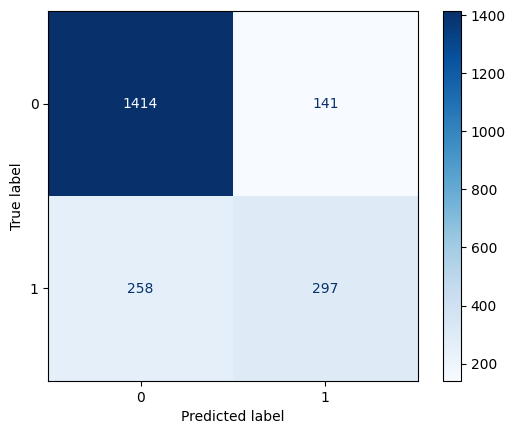

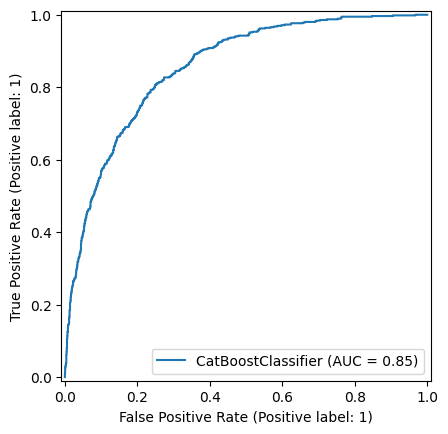

In [60]:
evaluate(cbc, cbc_preds)